In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from pathlib import Path
import pickle as pkl

sys.path.append('..')

import evaluation

%matplotlib inline

In [3]:
df_all = pd.read_csv('../reports/comb_nw/results.csv')

In [9]:
df_all['ensemble'] = df_all['ensemble'].astype(bool)

## Investigate training progression

In [18]:
def get_experiment(n_samples, combinations):
    return df_all[(df_all['n_samples'] == n_samples) & (df_all['combinations'] == combinations)]

def plot_experiment(experiment, ax=None, title=None):
    if not ax:
        ax = plt.subplot(111)
    for n in range(10):
        tmp = experiment[experiment['num'] == n]
        base = tmp[~tmp['ensemble']].dropna()
        ax.plot(range(1, 16), base['smape'], c='0.5', alpha=0.5)
        ens = tmp[tmp['ensemble']].dropna()
        ax.plot(range(1, 16), ens['smape'], c='C0', alpha=0.5)
        ax.scatter([15], list(experiment[experiment['epoch'].isna()]['smape']), c='C1', marker='x')
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.set_title(title)

In [19]:
combs = [{'n_samples': 140000, 'combinations': 2},
         {'n_samples': 1400000, 'combinations': 2},
         {'n_samples': 14000000, 'combinations': 2}]

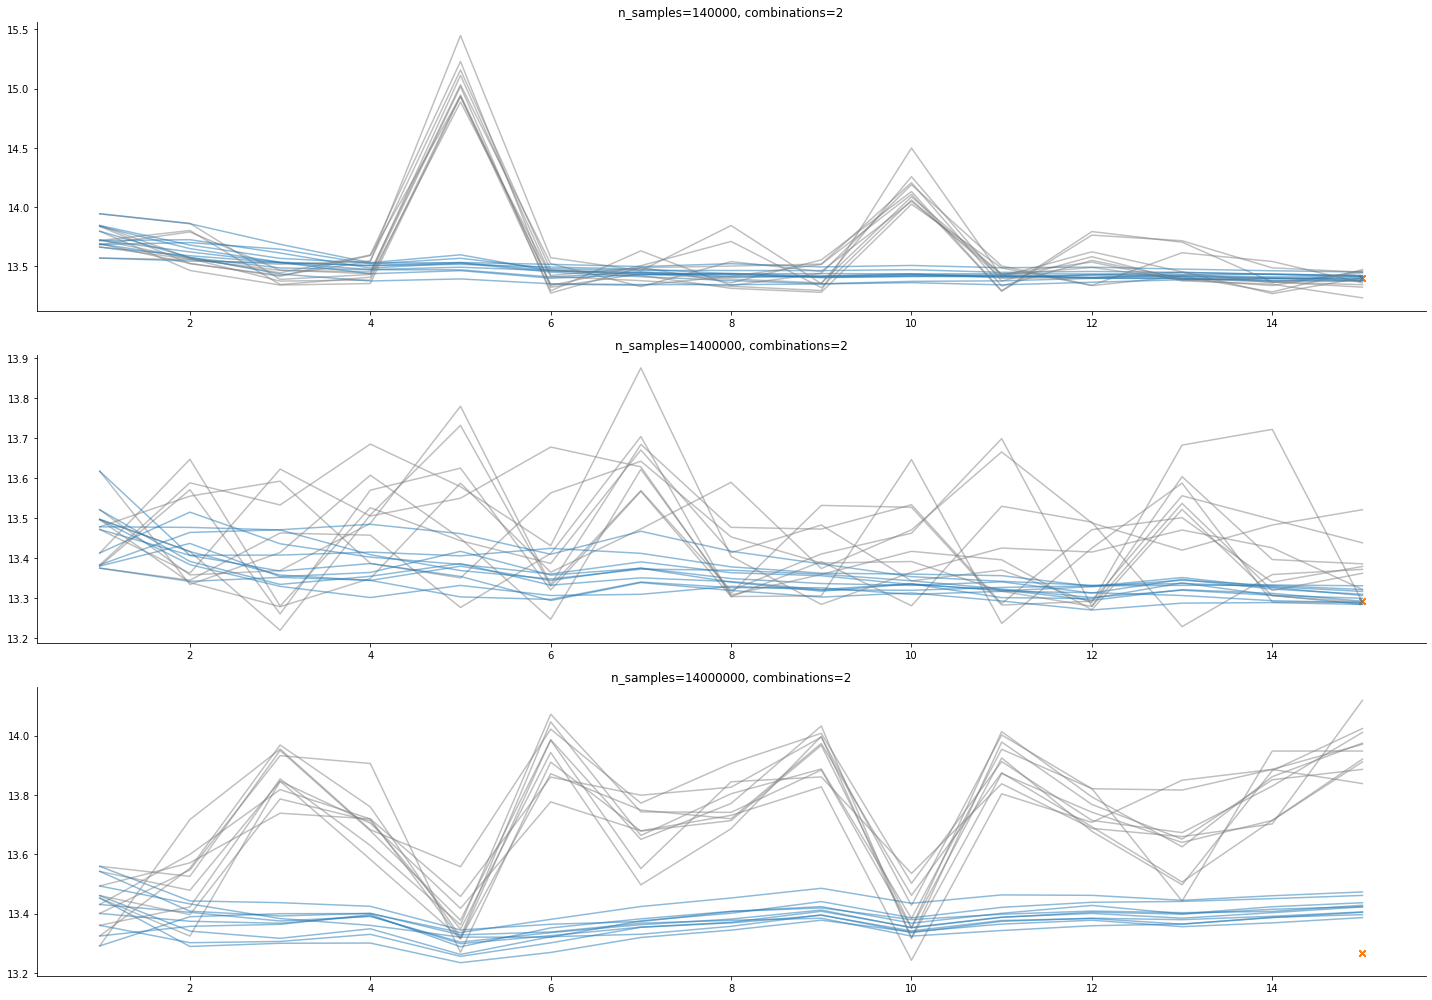

In [20]:
plt.figure(figsize=(20, 14))

for i in range(3):
    ax = plt.subplot(3, 1, i+1)
    n_samples = combs[i]['n_samples']
    combinations = combs[i]['combinations']
    ex = get_experiment(n_samples, combinations)
    title = 'n_samples={}, combinations={}'.format(n_samples, combinations)
    plot_experiment(ex, ax=ax, title=title)
    
plt.tight_layout()

## Num samples

In [32]:
df = df_all[(df_all['ensemble']) & (df_all['epoch'].isna())].sort_values('n_samples')

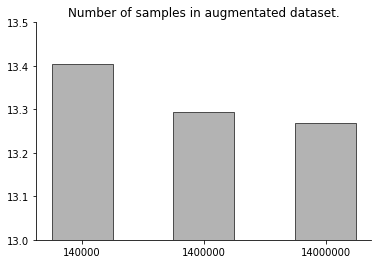

In [51]:
plt.bar(range(3), height=df['smape'], width=0.5, color='0.7', edgecolor='0.3')

plt.xticks([0, 1, 2], df['n_samples'])
plt.ylim([13, 13.5])
plt.title('Number of samples in augmentated dataset.')

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

## Combinations

<AxesSubplot:xlabel='combinations', ylabel='smape'>

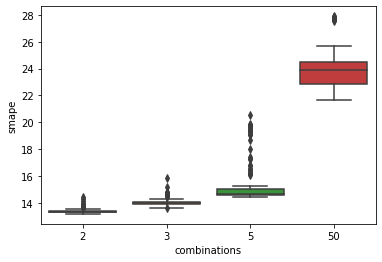

In [23]:
sns.boxplot(x='combinations', y='smape', data=df[df['n_samples'] == 140000])

In [24]:
df.sort_values('smape')

,input_len,n_samples,combinations,num,epoch,ensemble,smape,mase*
1486,18,140000,2,8.0,1,True,13.164625,2.669468
1488,18,140000,2,8.0,2,True,13.184924,2.679224
1510,18,140000,2,8.0,13,True,13.217516,2.692436
1512,18,140000,2,8.0,14,True,13.223116,2.694750
1496,18,140000,2,8.0,6,True,13.223495,2.693900
...,...,...,...,...,...,...,...,...
814,18,1400000,50,1.0,10,True,31.574379,7.684250
810,18,1400000,50,1.0,8,True,31.624678,7.764659
812,18,1400000,50,1.0,9,True,31.639921,7.727459
806,18,1400000,50,1.0,6,True,31.679968,7.788137


In [12]:
df.sort_values('smape')

,input_len,n_samples,combinations,num,epoch,ensemble,smape,mase*
1486,18,140000,2,8.0,1,True,13.164625,2.669468
1488,18,140000,2,8.0,2,True,13.184924,2.679224
1510,18,140000,2,8.0,13,True,13.217516,2.692436
1512,18,140000,2,8.0,14,True,13.223116,2.694750
1496,18,140000,2,8.0,6,True,13.223495,2.693900
...,...,...,...,...,...,...,...,...
814,18,1400000,50,1.0,10,True,31.574379,7.684250
810,18,1400000,50,1.0,8,True,31.624678,7.764659
812,18,1400000,50,1.0,9,True,31.639921,7.727459
806,18,1400000,50,1.0,6,True,31.679968,7.788137


Text(2.5, 14, 'baseline')

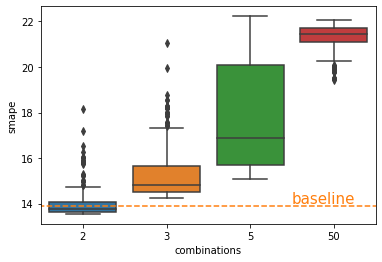

In [37]:
ax = sns.boxplot(x='combinations', y='smape', data=df[df['n_samples'] == 14000])

xlim = ax.get_xlim()
plt.plot([-1, 5], [13.893, 13.893], c='C1', ls='--')
ax.set_xlim(xlim)
ax.text(2.5, 14, 'baseline', size=15, c='C1')